# Designing a Predictive Model for Diabetes using Health Indicators


Jesse Luyan, Shanmei Liu, Aditya Bakshi, Kshitij Doshi

# Introduction


Diabetes is a chronic disease that affects millions of people worldwide, and it can lead to a range of serious and deathly complications. As of 2020, a yearly number of 1 million deaths have been recorded due to diabetes alone(Khan, 2020). Many factors influence the risk of diabetes, which includes smoking, BMI, and physical health.

Alex Teboul created a data set and collected it from the Centers for Disease Control and Preventions(CDC). The data set consists of survey responses from ~ 400,000 Americans regarding several diabetes predictors that are used in our project, the variables are as follow:


HighBP : Respondents with high blood pressure. 

HighChol : Respondents with high cholesterol.

CholCheck : Cholesterol check within past five years. 

BMI : Body Mass Index of respondents.

Age: Scaled age of respondents.

Smoker : Respondents who have smoked at least 100 cigarettes. 

Stroke : Respondents who had a stroke. 

HeartDiseaseorAttack : Respondents with heart disease or heart attack experience .

PhysActivity : Physical activity during the past 30 days. 

Fruits : Consume Fruit 1 or more times per day. 

Veggies : Consume Vegetables 1 or more times per day.

HvyAlcoholConsump : Heavy drinkers respondents.

DiffWalking: Respondents who have difficulty walking.

Education: Education scale of respondents.

Income: Income scale of respondents.

Sex: male or female.

GenHlth: General health. 

PhysHlth: Physical health for the past 30 days, injuries or no injuries.

MentHlth: Mental Health. 

AnyHealthCare: Health coverage.


We believe that this dataset can be used in building an accurate predictive model for diabetes, which could improve the prognosis of the disease as practitioners will be able to detect diabetes early on. In this study, we are using KNN-classification as they have been shown to be the most accurate algorithm for diabetes prediction based on previous studies (Mujumdar, 2019). To do this, we evaluate how each variable affects the risk of getting diabetes and finally answer the question of, “Which variables increase the risk of diabetes the most and can be used in predicting the disease?”


# Methods (summary)
    
While there may be numerous methods to conduct such an analysis, we find that a predictive classification model would suit best for our purpose of the research for two reasons: 
    
Reason 1: our target is to identify a categorical variable
    
Reason 2: a relatively simple algorithm to implement.

1. Preliminary analysis is run to select the factors in raw dataset to build our predictive classification model.

2. In order to identify the potential predictors, binary and numerical variables are separated, explored, and visualized separately. 

3. In order to build a good-quality classification model,  the data is split into training dataset and testing dataset, which can be used to test the quality of overall classifier.

4. Cross-validation is done by tuning the data set to choose the most ideal K. In R, we can use the vfold_cv function to do this.

5. Line diagram is created to pick the best K. In this case, we should roughly select the most ideal one that is not too large or too small. 

6. A workflow is created that contains the recipe and new specification after choosing the best K for the analysis.

7. The model is then trained and used in the testing set to examine the quality and accuracy of the model, and a confusion matrix is made.
 
8. Visualization of the predictive model was compared to the actual model for each variable.

# Methods (with code)

First, we download the data from the url and read it in Jupyter.

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(GGally)
library(ISLR)
library(infer)
library(cowplot)
#library(corrplot)
#options(repr.matrix.max.rows = 6)
#source('tests.R')
#source('cleanup.R')

url <- "https://drive.google.com/u/0/uc?id=1OAZCpZGdFPy70ll_Fo2ow5dpaM1sG_47&amp;export=download"
diabetes_data <- read_csv(url)

summary(diabetes_data)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

 Diabetes_binary     HighBP          HighChol        CholCheck     
 Min.   :0.0     Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.0     1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:1.0000  
 Median :0.5     Median :1.0000   Median :1.0000   Median :1.0000  
 Mean   :0.5     Mean   :0.5635   Mean   :0.5257   Mean   :0.9753  
 3rd Qu.:1.0     3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:1.0000  
 Max.   :1.0     Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  
      BMI            Smoker           Stroke        HeartDiseaseorAttack
 Min.   :12.00   Min.   :0.0000   Min.   :0.00000   Min.   :0.0000      
 1st Qu.:25.00   1st Qu.:0.0000   1st Qu.:0.00000   1st Qu.:0.0000      
 Median :29.00   Median :0.0000   Median :0.00000   Median :0.0000      
 Mean   :29.86   Mean   :0.4753   Mean   :0.06217   Mean   :0.1478      
 3rd Qu.:33.00   3rd Qu.:1.0000   3rd Qu.:0.00000   3rd Qu.:0.0000      
 Max.   :98.00   Max.   :1.0000   Max.   :1.00000   Max.   :1.0000      
  PhysActivit

In [2]:
# make more readable, slice the data
slice(diabetes_data, 1:10)

Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,⋯,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,1,0,1,26,0,0,0,1,0,⋯,1,0,3,5,30,0,1,4,6,8
0,1,1,1,26,1,1,0,0,1,⋯,1,0,3,0,0,0,1,12,6,8
0,0,0,1,26,0,0,0,1,1,⋯,1,0,1,0,10,0,1,13,6,8
0,1,1,1,28,1,0,0,1,1,⋯,1,0,3,0,3,0,1,11,6,8
0,0,0,1,29,1,0,0,1,1,⋯,1,0,2,0,0,0,0,8,5,8
0,0,0,1,18,0,0,0,1,1,⋯,0,0,2,7,0,0,0,1,4,7
0,0,1,1,26,1,0,0,1,1,⋯,1,0,1,0,0,0,1,13,5,6
0,0,0,1,31,1,0,0,0,1,⋯,1,0,4,0,0,0,1,6,4,3
0,0,0,1,32,0,0,0,1,1,⋯,1,0,3,0,0,0,0,3,6,8


[Figure 1: raw dataset]

# Exploratory data analysis 


Since the whole dataset contains 21 explanatory variables, based on KNN classification algorithm, we filter the irrelevant factors and keep the potential exploratory variables to build the classifer. Diabetes_binary is also mutated to categorical variable and the numerical and binary variables are separated to be analyzed individually. The slice function was also used to slice the first 10 rows for readability.


In [3]:

diabetes_numerical_data <- diabetes_data |>
    mutate(Diabetes_binary = as.factor(Diabetes_binary)) |>
    select(-Smoker,
           -PhysActivity,
          -Veggies,
          -HvyAlcoholConsump, -AnyHealthcare, -NoDocbcCost, 
          -DiffWalk,
          -Sex,-HighBP, -HighChol, -CholCheck,
          -Stroke,-HeartDiseaseorAttack, -Fruits) |>
      summarize(across(Diabetes_binary:Income,na.rm =TRUE)) 

# select(BMI,Age,Income,Smoker,Diabetes_binary)

slice(diabetes_numerical_data, 1:10)


Diabetes_binary,BMI,GenHlth,MentHlth,PhysHlth,Age,Education,Income
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,26,3,5,30,4,6,8
0,26,3,0,0,12,6,8
0,26,1,0,10,13,6,8
0,28,3,0,3,11,6,8
0,29,2,0,0,8,5,8
0,18,2,7,0,1,4,7
0,26,1,0,0,13,5,6
0,31,4,0,0,6,4,3
0,32,3,0,0,3,6,8


[Figure 2: Diabetes data with numerical variables]

In [4]:
diabetes_logical_data <- diabetes_data |>
    mutate(Diabetes_binary = as.factor(Diabetes_binary)) |>
    select(Smoker,
           PhysActivity,
          Veggies,
          HvyAlcoholConsump, AnyHealthcare, NoDocbcCost, 
          DiffWalk,
          Sex, HighBP, HighChol, CholCheck,
          Stroke, HeartDiseaseorAttack, Fruits, Diabetes_binary) |>
    summarize(across(Smoker:Diabetes_binary,na.rm =TRUE)) 
     

slice(diabetes_logical_data,1:10)

Smoker,PhysActivity,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,DiffWalk,Sex,HighBP,HighChol,CholCheck,Stroke,HeartDiseaseorAttack,Fruits,Diabetes_binary
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0,1,1,0,1,0,0,1,1,0,1,0,0,0,0
1,0,0,0,1,0,0,1,1,1,1,1,0,1,0
0,1,1,0,1,0,0,1,0,0,1,0,0,1,0
1,1,1,0,1,0,0,1,1,1,1,0,0,1,0
1,1,1,0,1,0,0,0,0,0,1,0,0,1,0
0,1,1,0,0,0,0,0,0,0,1,0,0,1,0
1,1,1,1,1,0,0,1,0,1,1,0,0,1,0
1,0,1,0,1,0,0,1,0,0,1,0,0,1,0
0,1,1,0,1,0,0,0,0,0,1,0,0,1,0


[Figure 3: Diabetes data with logical/binary variables]

# Analysis and Visualization: Binary Variables

Before visualizing the data, we calculate the proportion of diabetes and non-diabetes patients in the dataset. 



In [5]:

# the number of diabetes and non diabetes patitent is the same, so the amount of each sympton means the prop
num_obs <- nrow(diabetes_data)
prop <- diabetes_data|>
        group_by(Diabetes_binary) |>
        summarize(count = n(), percentage = n()/ num_obs *100) 
        
prop

Diabetes_binary,count,percentage
<dbl>,<int>,<dbl>
0,35346,50
1,35346,50


[Figure 4: The proportion of diabetes and non-diabetes in the data set (50-50)]

Next, to explore the data with binary variables, we wrangle the data and calculate the frequency of diabetes 
and non-diabetes patients with each symptoms or factors (binary). The visualization of bar plot was made.

In [6]:
diabetes_subset <- diabetes_logical_data |>
        filter(Diabetes_binary == "1") |>
        summarize(across(Smoker:Fruits,sum, na.rm =TRUE)) |>
                pivot_longer(cols = Smoker:Fruits,
                     names_to = "logical_factor",
                     values_to = "logical_value")
non_diabetes_subset <- diabetes_logical_data |>
       filter(Diabetes_binary == "0") |>
        summarize(across(Smoker:Fruits,sum, na.rm =TRUE)) |>
                pivot_longer(cols = Smoker:Fruits,
                     names_to = "logical_factor",
                     values_to = "logical_value") 

com_logical_factor <- left_join(non_diabetes_subset,diabetes_subset,by = "logical_factor")|>
mutate(number_non_diabetes = logical_value.x)|>
mutate(number_diabetes = logical_value.y) |>
select(logical_factor, number_non_diabetes, number_diabetes) |>
mutate(total = number_diabetes + number_non_diabetes) |>
mutate(diabetes_prop = number_diabetes/total)

com_logical_factor 

logical_factor,number_non_diabetes,number_diabetes,total,diabetes_prop
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Smoker,15281,18317,33598,0.5451813
PhysActivity,27412,22287,49699,0.4484396
Veggies,29024,26736,55760,0.4794835
HvyAlcoholConsump,2188,832,3020,0.2754967
AnyHealthcare,33584,33924,67508,0.5025182
NoDocbcCost,2897,3742,6639,0.5636391
DiffWalk,4745,13121,17866,0.7344117
Sex,15371,16935,32306,0.5242060
HighBP,13228,26604,39832,0.6679052


[Figure 5. logical data exploration]

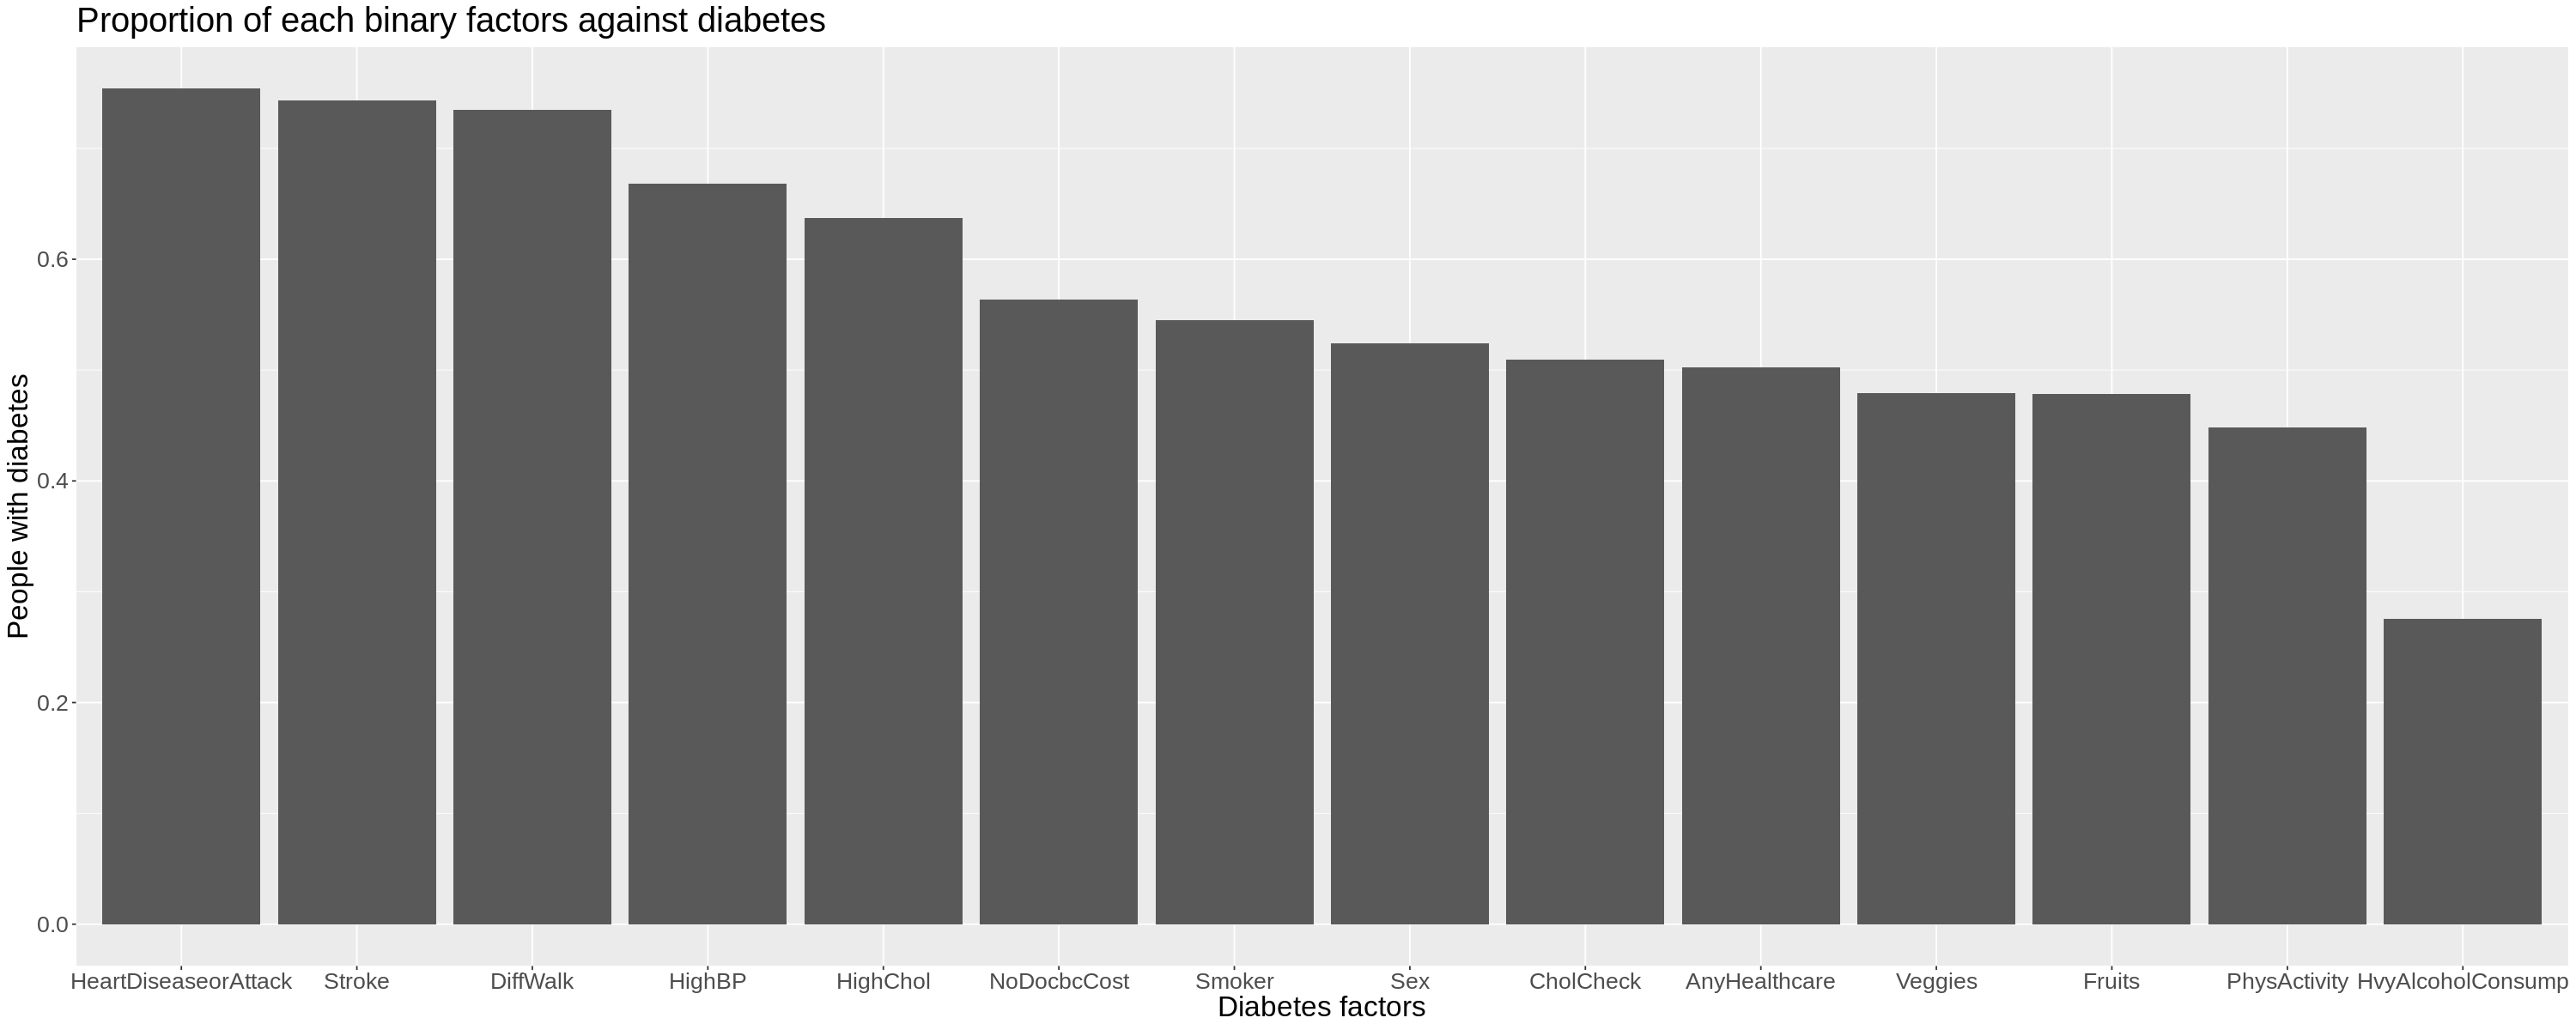

In [20]:
options(repr.plot.width = 25, repr.plot.height = 10)
# make a bar chart with proportion of diabetes and non diabetes patitent
diabetes_diff <- ggplot(com_logical_factor, aes(x = fct_reorder(logical_factor,diabetes_prop, .desc = TRUE),
                                                   y = diabetes_prop))+
        geom_bar(stat = "identity") +
        labs(x = "Diabetes factors", y = "People with diabetes") +
        ggtitle("Proportion of each binary factors against diabetes")+
        theme(text = element_text(size = 20))
diabetes_diff 
# make a bar chart with proportion of diabetes and non diabetes patitent

[Figure 6: The different frequency for the logical variables]

As we can see from the bar plot, the proportion for HeartDiseaseorAttack, Stroke, and DiffWalk are higher than other factors for diabetes patients. 
Hence we identify these 3 factors as potential predictors and add them to build the classification model.

# Analysis and Visualization: Numerical Variables 

Next, we visualize the numerical variables as well but this time with a histogram as it is
more ideal to look at the distribution in this case.

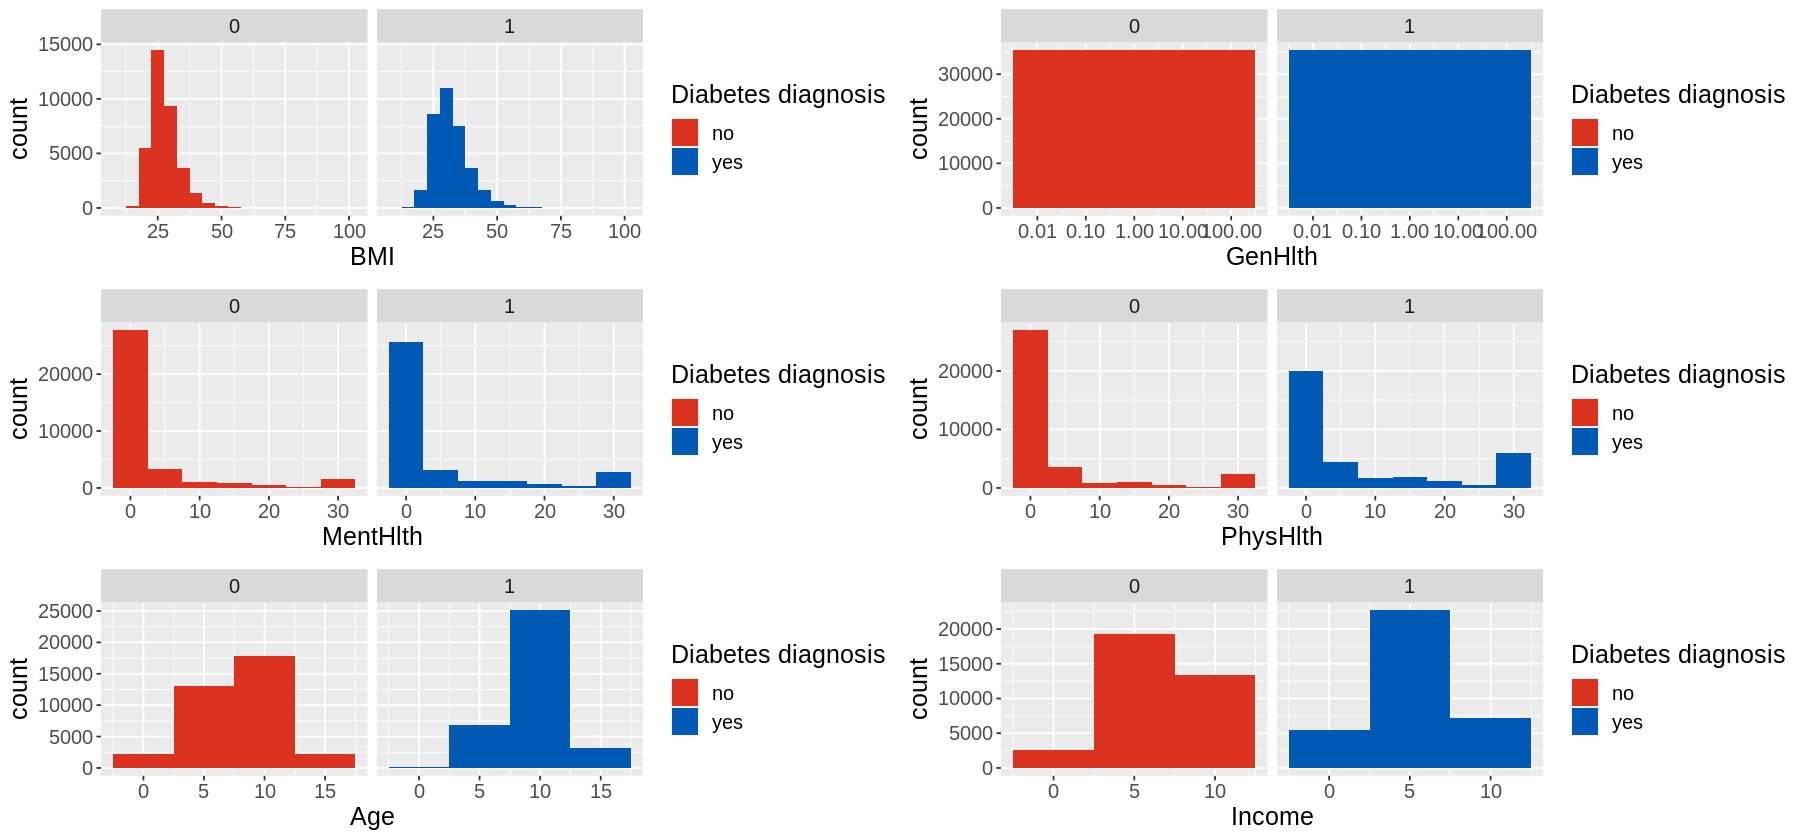

In [8]:
library(scales)

BMI_dis <- ggplot(diabetes_numerical_data, aes(x = BMI, fill = Diabetes_binary)) +
        geom_histogram(binwidth = 5) +
        facet_grid(cols = vars(Diabetes_binary)) +
        labs(x = "BMI", fill = "Diabetes diagnosis") +
         theme(text = element_text(size = 15)) +
        scale_fill_manual(labels = c("no", "yes"), values = c("#DC3220", "#005AB5"))

GenHlth_dis <- ggplot(diabetes_numerical_data, aes(x = GenHlth, fill = Diabetes_binary)) +
        geom_histogram(binwidth = 5) +
        facet_grid(cols = vars(Diabetes_binary)) +
        labs(x = "GenHlth", fill = "Diabetes diagnosis") +
        theme(text = element_text(size = 15)) +
        scale_x_log10(labels = comma) +
   scale_fill_manual(labels = c("no", "yes"), values = c("#DC3220", "#005AB5"))

MentHlth_dis <- ggplot(diabetes_numerical_data, aes(x = MentHlth, fill = Diabetes_binary)) +
        geom_histogram(binwidth = 5) +
        facet_grid(cols = vars(Diabetes_binary)) +
        labs(x = "MentHlth", fill = "Diabetes diagnosis") +
         theme(text = element_text(size = 15)) +
         scale_fill_manual(labels = c("no", "yes"), values = c("#DC3220", "#005AB5"))

PhysHlth_dis <- ggplot(diabetes_numerical_data, aes(x = PhysHlth, fill = Diabetes_binary)) +
        geom_histogram(binwidth = 5) +
        facet_grid(cols = vars(Diabetes_binary)) +
        labs(x = "PhysHlth", fill = "Diabetes diagnosis") +
         theme(text = element_text(size = 15)) +
        scale_fill_manual(labels = c("no", "yes"), values = c("#DC3220", "#005AB5"))

Age_dis <- ggplot(diabetes_numerical_data, aes(x = Age, fill = Diabetes_binary)) +
        geom_histogram(binwidth = 5) +
        facet_grid(cols = vars(Diabetes_binary)) +
        labs(x = "Age", fill = "Diabetes diagnosis") +
         theme(text = element_text(size = 15)) +
         scale_fill_manual(labels = c("no", "yes"), values = c("#DC3220", "#005AB5"))

Income_dis <- ggplot(diabetes_numerical_data, aes(x = Income, fill = Diabetes_binary)) +
        geom_histogram(binwidth = 5) +
        facet_grid(cols = vars(Diabetes_binary)) +
        labs(x = "Income", fill = "Diabetes diagnosis") +
         theme(text = element_text(size = 15)) +
         scale_fill_manual(labels = c("no", "yes"), values = c("#DC3220", "#005AB5"))

options(repr.plot.width = 15, repr.plot.height = 7)
plot_grid(BMI_dis,GenHlth_dis,MentHlth_dis,
          PhysHlth_dis,Age_dis, Income_dis, ncol = 2) + ggtitle("Distribution for numerical factors with comparison")


[Figure 7: Comparison and visualization for logical variables distribution]

By comparing the six numerical variables distribution for diabetes and non-diabetes people, we could identify BMI, Age, and physical health as the potential predictors in our classifier since they affect diabetes the most. For BMI, people who are slightly overweight tend to have diabetes as the red colored distribution that represents people without diabetes is on the lower side than the blue colored distribution. We can also see that older people are more likely to be diagnosed with diabetes than younger people from the upward trend of the blue colored distribution on the Age plot. Lastly, people with lower physical health seems to have diabetes which is indicated from the downward trend in the blue PhysHlth plot. Predictors are selected by exploring and analyzing these plots.

Finally, we form the clean dataset with relevant exploratory variables that have been chosen. Based on the  analysis, three numerical factors (BMI, Age, and PhyHlth) and three binary factors(HeartDiseaseorAttack, Stroke, DiffWalk) are the risk factors with the greatest impact on diabetes.

In [9]:
# clean the cols with irrelevant variables
diabetes_clean <- diabetes_data |>
    mutate(Diabetes_binary = as.factor(Diabetes_binary)) |>
    select(BMI,PhysHlth,Age,HeartDiseaseorAttack,Stroke,DiffWalk, Diabetes_binary)
slice(diabetes_clean,1:15)

BMI,PhysHlth,Age,HeartDiseaseorAttack,Stroke,DiffWalk,Diabetes_binary
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
26,30,4,0,0,0,0
26,0,12,0,1,0,0
26,10,13,0,0,0,0
28,3,11,0,0,0,0
29,0,8,0,0,0,0
18,0,1,0,0,0,0
26,0,13,0,0,0,0
31,0,6,0,0,0,0
32,0,3,0,0,0,0


[Figure 8: Clean diabetes dataset]

# Classification: Building a classifier and tuning the model

In this section, we used the chosen variables to build a KNN classification model to answer a predictive question: Given that a person is checked for these risk factors, could we predict whether they have diabetes?. To build and evaluate the accuracy of this model, we begin by splitting the clean dataset into training and testing dataset with prop = 0.75.

In [10]:
set.seed(1)
diabetes_split <- initial_split(diabetes_clean, prop =0.75, strata = Diabetes_binary) 
diabetes_train <-training(diabetes_split)
diabetes_test <-testing(diabetes_split)


In KNN classification model, we tune the model with cross-validation to find the ideal K value.

In [11]:
# tuning and build the classifier by using cross-validation

set.seed(1)
diabetes_vfold <- vfold_cv(diabetes_train, v = 5, strata = Diabetes_binary)

diabetes_recipe <- recipe(Diabetes_binary ~ ., data =diabetes_train)  |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

kval = tibble(neighbors = seq(1:15))

knn_results <- workflow() |>
  add_recipe(diabetes_recipe) |>
  add_model(knn_spec) |>
  tune_grid(resamples = diabetes_vfold, grid = kval) |>
  collect_metrics() |>
  filter(.metric == "accuracy")

knn_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.6023805,5,0.0017906395,Preprocessor1_Model01
2,accuracy,binary,0.5976649,5,0.0019565971,Preprocessor1_Model02
3,accuracy,binary,0.6289939,5,0.0019827441,Preprocessor1_Model03
4,accuracy,binary,0.6274662,5,0.0018003965,Preprocessor1_Model04
5,accuracy,binary,0.6437250,5,0.0025849977,Preprocessor1_Model05
6,accuracy,binary,0.6425932,5,0.0023057774,Preprocessor1_Model06
7,accuracy,binary,0.6542307,5,0.0018040482,Preprocessor1_Model07
8,accuracy,binary,0.6536460,5,0.0013786326,Preprocessor1_Model08
9,accuracy,binary,0.6599645,5,0.0008685173,Preprocessor1_Model09


[Figure 10.1 : Result from tuning the model]

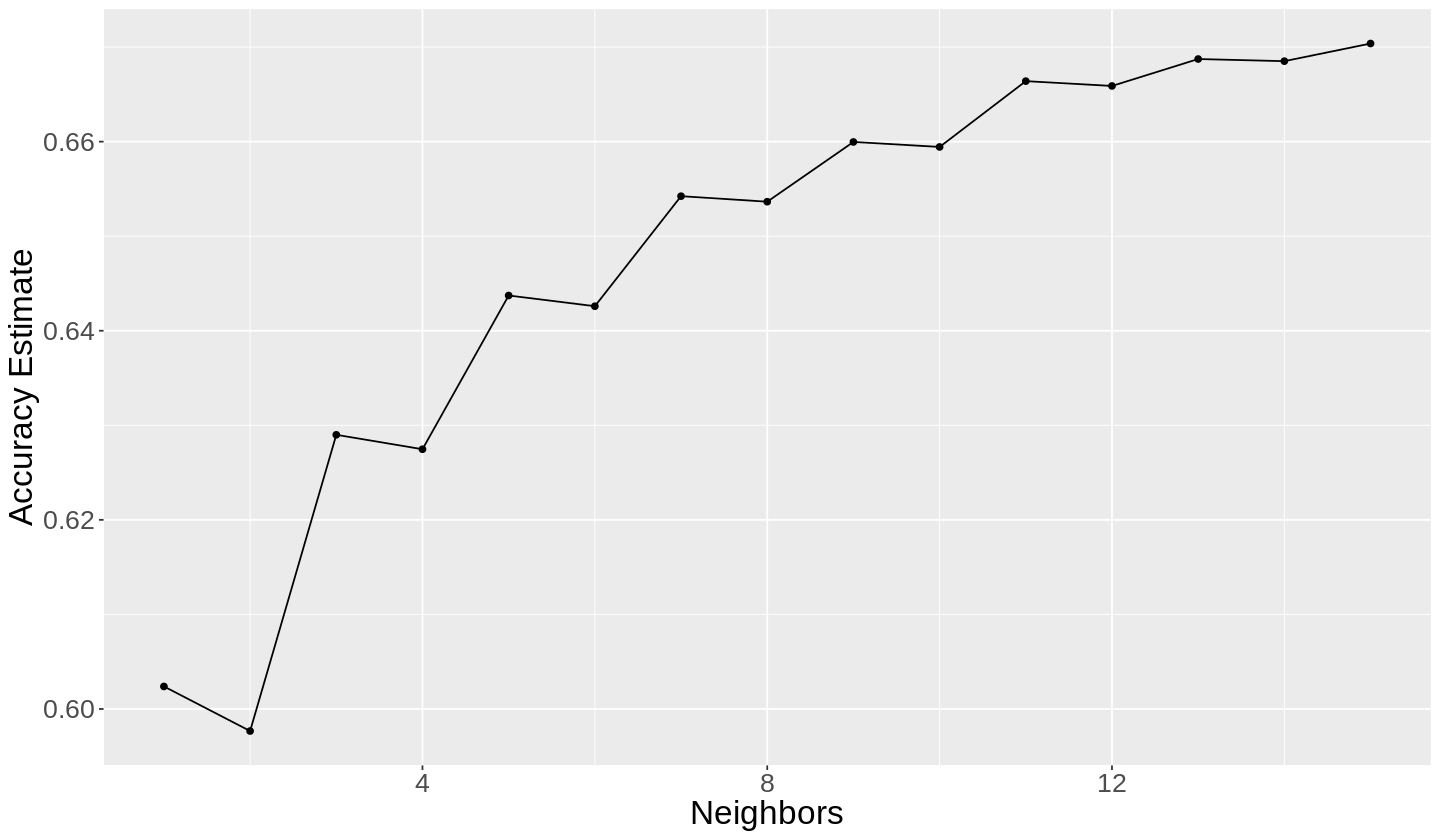

In [12]:
options(repr.plot.width = 12, repr.plot.height = 7)

# Plot k values against their respective accuracies and choose optimal k value
cross_val_plot <- knn_results |> 
    ggplot(aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = "Neighbors", y = "Accuracy Estimate") +
    theme(text = element_text(size = 20))+
    ggtitle("Cross validation accuracies vs number of neighbours")

cross_val_plot

[Figure 10.2 : Accuracy vs Neighbours plot]

The best K is placed in the classifier. Although K = 20 or larger could reach higher accuracy, the increase in the range of neigbours causes the classifier to slow down and does not increase the accuracy of K significantly. Therefore, we limit the neighbours and determine from the plot that K = 15 is ideal and reasonable.

In [13]:
# making a new knn spec with the newly chosen k
knn_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 15) |>
  set_engine("kknn") |>
  set_mode("classification")

diabetes_fit <- workflow() |>
  add_recipe(diabetes_recipe) |>
  add_model(knn_best_spec) |>
  fit(data = diabetes_train)


In order to evaluate the quality of our model, we use the testing dataset to predict the categories and calculate the accuracy.

In [14]:
# using test dataset to evaluate the quality of classifier, then interpret the result

diabetes_predictions <- predict(diabetes_fit, diabetes_test) |> 
    bind_cols(diabetes_test)
diabetes_predictions

# Compare the accuracy of predictions to the true values in the test set
diabetes_acc <- diabetes_predictions |> 
    metrics(truth = Diabetes_binary, estimate = .pred_class)  |>
    select(.metric, .estimate)|> 
    filter(.metric == "accuracy")
diabetes_acc


.pred_class,BMI,PhysHlth,Age,HeartDiseaseorAttack,Stroke,DiffWalk,Diabetes_binary
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0,32,0,3,0,0,0,0
0,27,6,6,0,0,0,0
0,27,0,7,0,0,0,0
0,18,0,10,0,0,0,0
0,22,0,6,0,0,0,0
1,29,30,10,0,0,0,0
0,22,0,8,0,0,0,0
0,28,1,8,0,0,0,0
1,24,14,4,0,0,1,0


.metric,.estimate
<chr>,<dbl>
accuracy,0.667025


[Figure 11. Accuracy when tested on testing data]

In [15]:
# Compare the predictions to the true values in a confusion matrix
diabetes_cm <- diabetes_predictions |> 
    conf_mat(truth = Diabetes_binary, estimate = .pred_class)

diabetes_cm

          Truth
Prediction    0    1
         0 7118 4166
         1 1719 4671

[Figure 12. Confusion Matrix of the model]

# Final Visualization 

To visualize the quality of our model, we create two plots for each specific variable in the predicted and actual models. By comparing the bar chart proportions, we know how well the model does in comparison to the actual model or data.

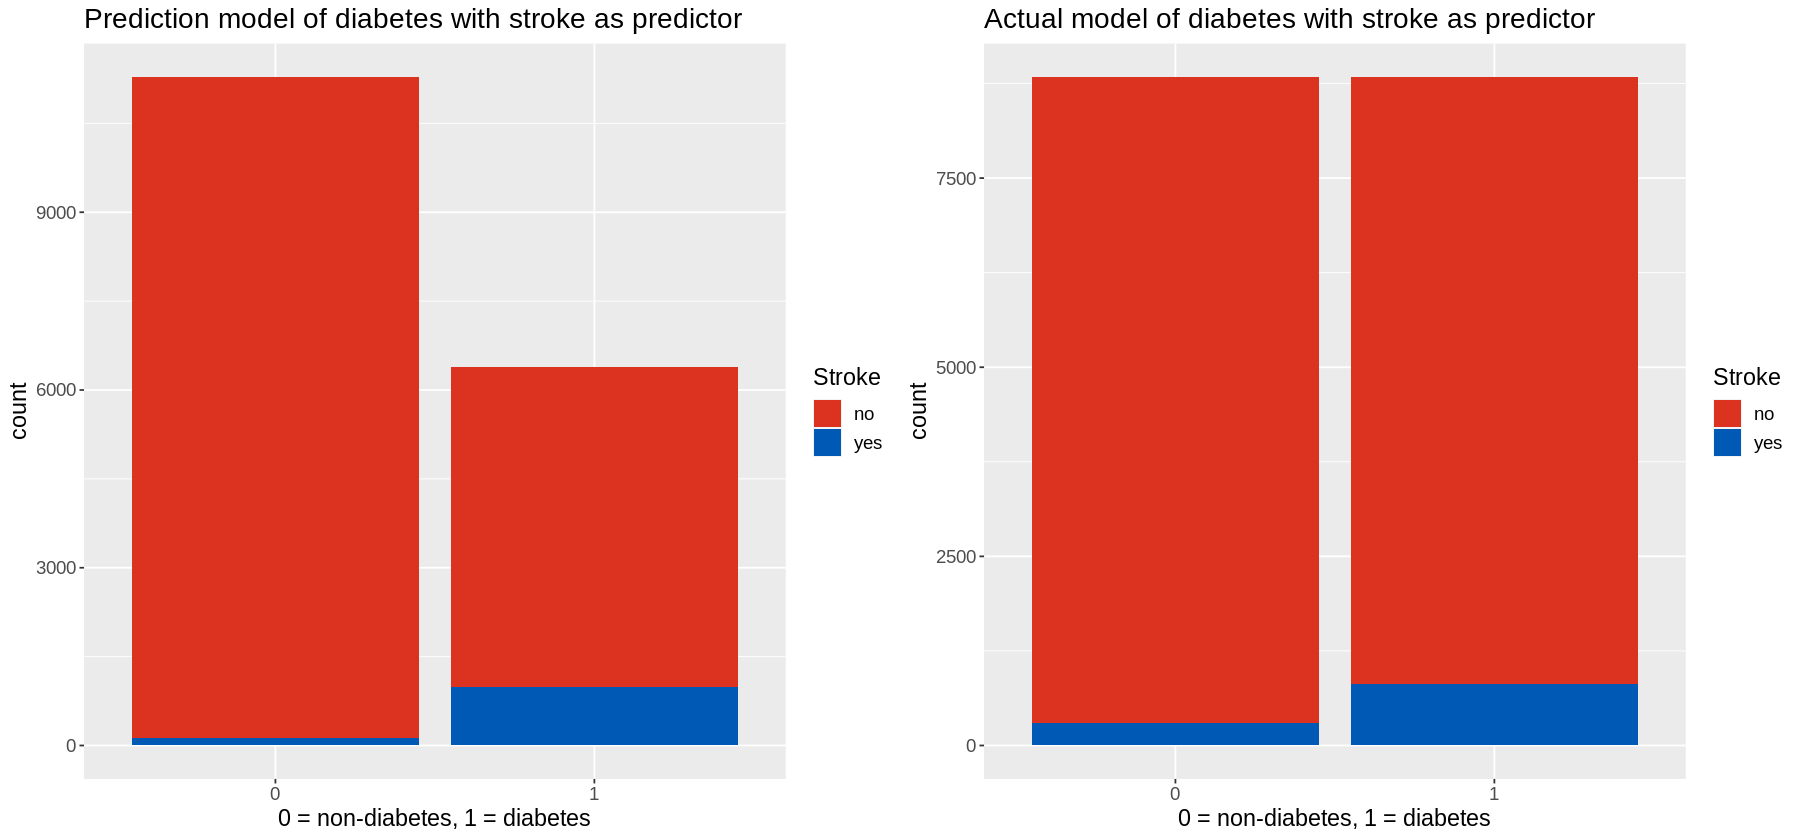

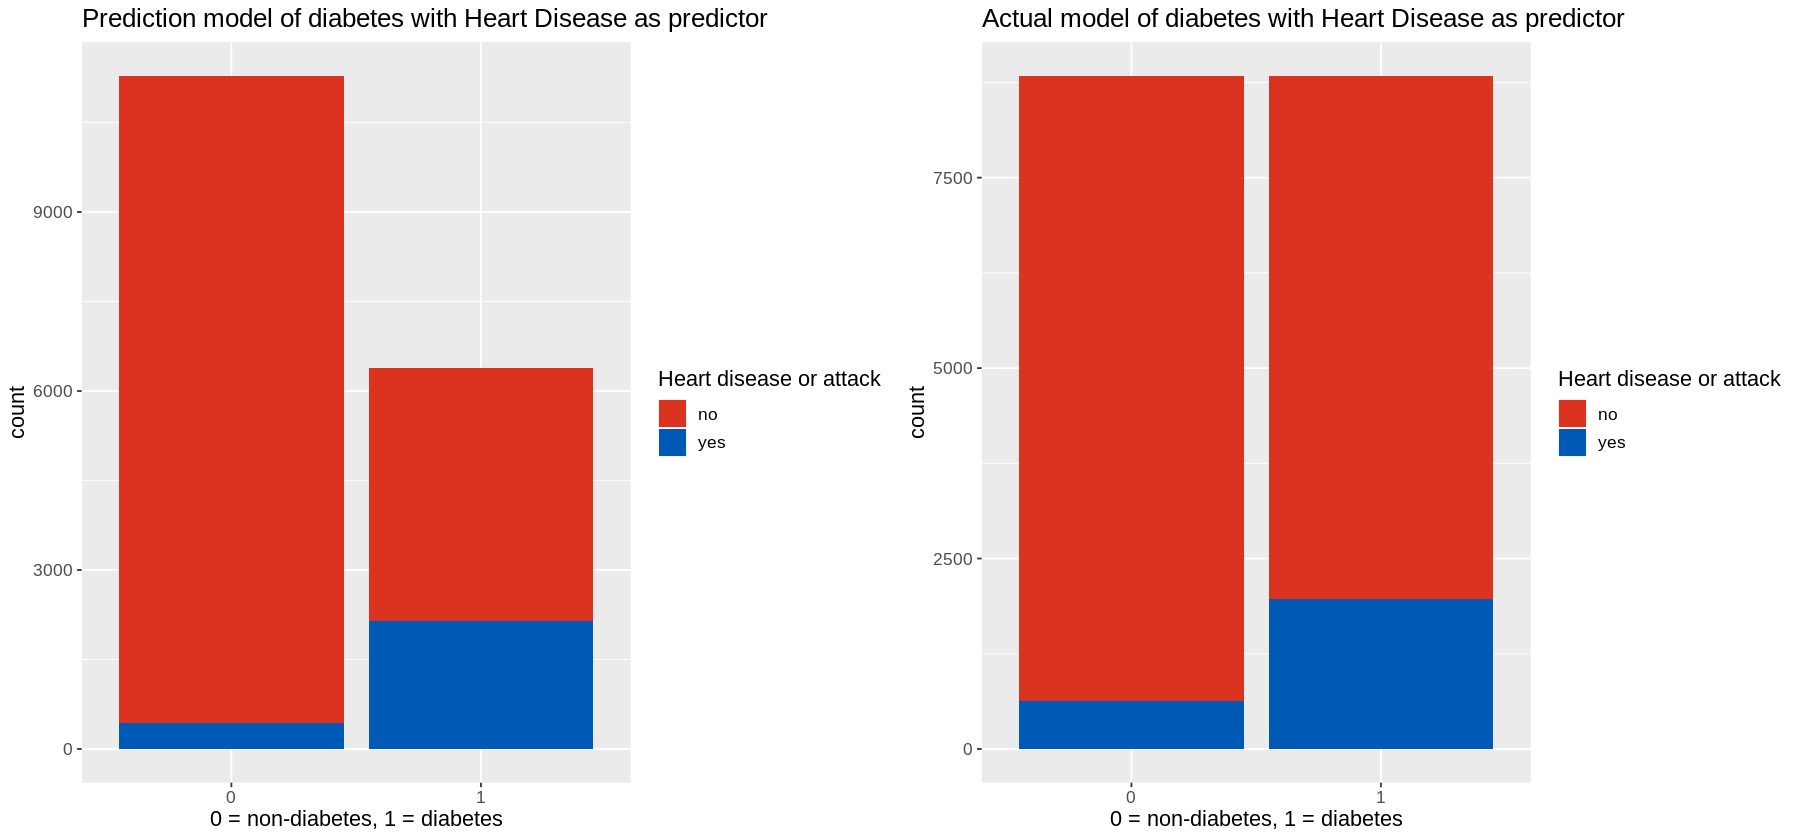

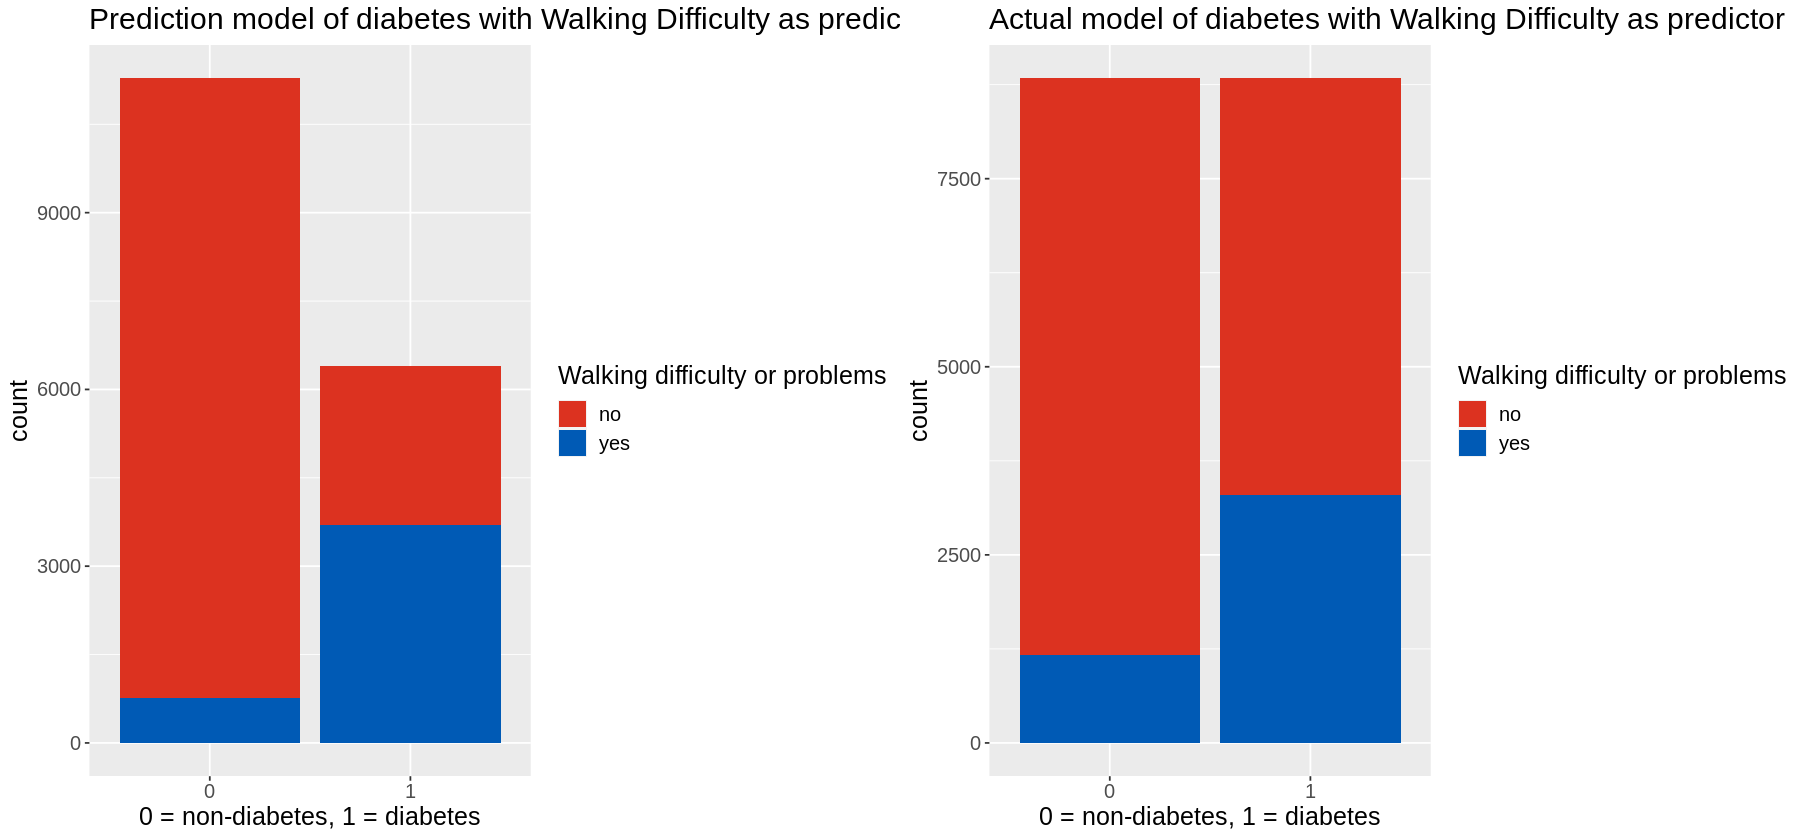

In [16]:
# visualize the logical classification result.
options(repr.plot.width=15, repr.plot.height=7)
Stroke_prediction <- diabetes_predictions |>
    ggplot(aes(x=.pred_class, fill =as_factor(Stroke))) +
    geom_bar() +
     labs(x = "0 = non-diabetes, 1 = diabetes",
          fill = "Stroke") +
         theme(text = element_text(size = 14)) +
         scale_fill_manual(labels = c("no", "yes"), values = c("#DC3220", "#005AB5"))+
        ggtitle("Prediction model of diabetes with stroke as predictor")

Stroke_actual <- diabetes_predictions |>
    ggplot(aes(x=Diabetes_binary, fill =as_factor(Stroke))) +
    geom_bar()+
     labs(x = "0 = non-diabetes, 1 = diabetes",
          fill = "Stroke") +
         theme(text = element_text(size = 14)) +
         scale_fill_manual(labels = c("no", "yes"), values = c("#DC3220", "#005AB5"))+
         ggtitle("Actual model of diabetes with stroke as predictor")

plot_grid(Stroke_prediction,Stroke_actual, ncol = 2)

Heart_prediction <- diabetes_predictions |>
    ggplot(aes(x=.pred_class, fill =as_factor(HeartDiseaseorAttack))) +
    geom_bar()+
     labs(x = "0 = non-diabetes, 1 = diabetes",
          fill = "Heart disease or attack") +
         theme(text = element_text(size = 13)) +
         scale_fill_manual(labels = c("no", "yes"), values = c("#DC3220", "#005AB5"))+
         ggtitle("Prediction model of diabetes with Heart Disease as predictor")

Heart_actual <- diabetes_predictions |>
    ggplot(aes(x=Diabetes_binary, fill =as_factor(HeartDiseaseorAttack))) +
    geom_bar()+
     labs(x = "0 = non-diabetes, 1 = diabetes",
          fill = "Heart disease or attack") +
         theme(text = element_text(size = 13)) +
         scale_fill_manual(labels = c("no", "yes"), values = c("#DC3220", "#005AB5"))+
         ggtitle("Actual model of diabetes with Heart Disease as predictor")

plot_grid(Heart_prediction,Heart_actual, ncol = 2)

DiffWalk_prediction <- diabetes_predictions |>
    ggplot(aes(x=.pred_class, fill =as_factor(DiffWalk))) +
    geom_bar()+
     labs(x = "0 = non-diabetes, 1 = diabetes",
          fill = "Walking difficulty or problems") +
         theme(text = element_text(size = 15)) +
         scale_fill_manual(labels = c("no", "yes"), values = c("#DC3220", "#005AB5"))+
         ggtitle("Prediction model of diabetes with Walking Difficulty as predictor")

DiffWalk_actual <- diabetes_predictions |>
    ggplot(aes(x=Diabetes_binary, fill =as_factor(DiffWalk))) +
    geom_bar()+
     labs(x = "0 = non-diabetes, 1 = diabetes",
          fill = "Walking difficulty or problems") +
         theme(text = element_text(size = 15)) +
         scale_fill_manual(labels = c("no", "yes"), values = c("#DC3220", "#005AB5"))+
        ggtitle("Actual model of diabetes with Walking Difficulty as predictor")

plot_grid(DiffWalk_prediction,DiffWalk_actual, ncol = 2)


[Figure 14. Predictive bar plots of stroke, HeartDiseaseorAttack, and DiffWalk with diabetes against the actual model/data plots]

The Bar charts show that non-diabetes people are less likely to have stroke, heart disease or attack, and walking difficulty while diabetes patients have a higher proportion of these factors. This pattern can be seen in both Predicted and Actual model plots, which means the predictive model is successful.

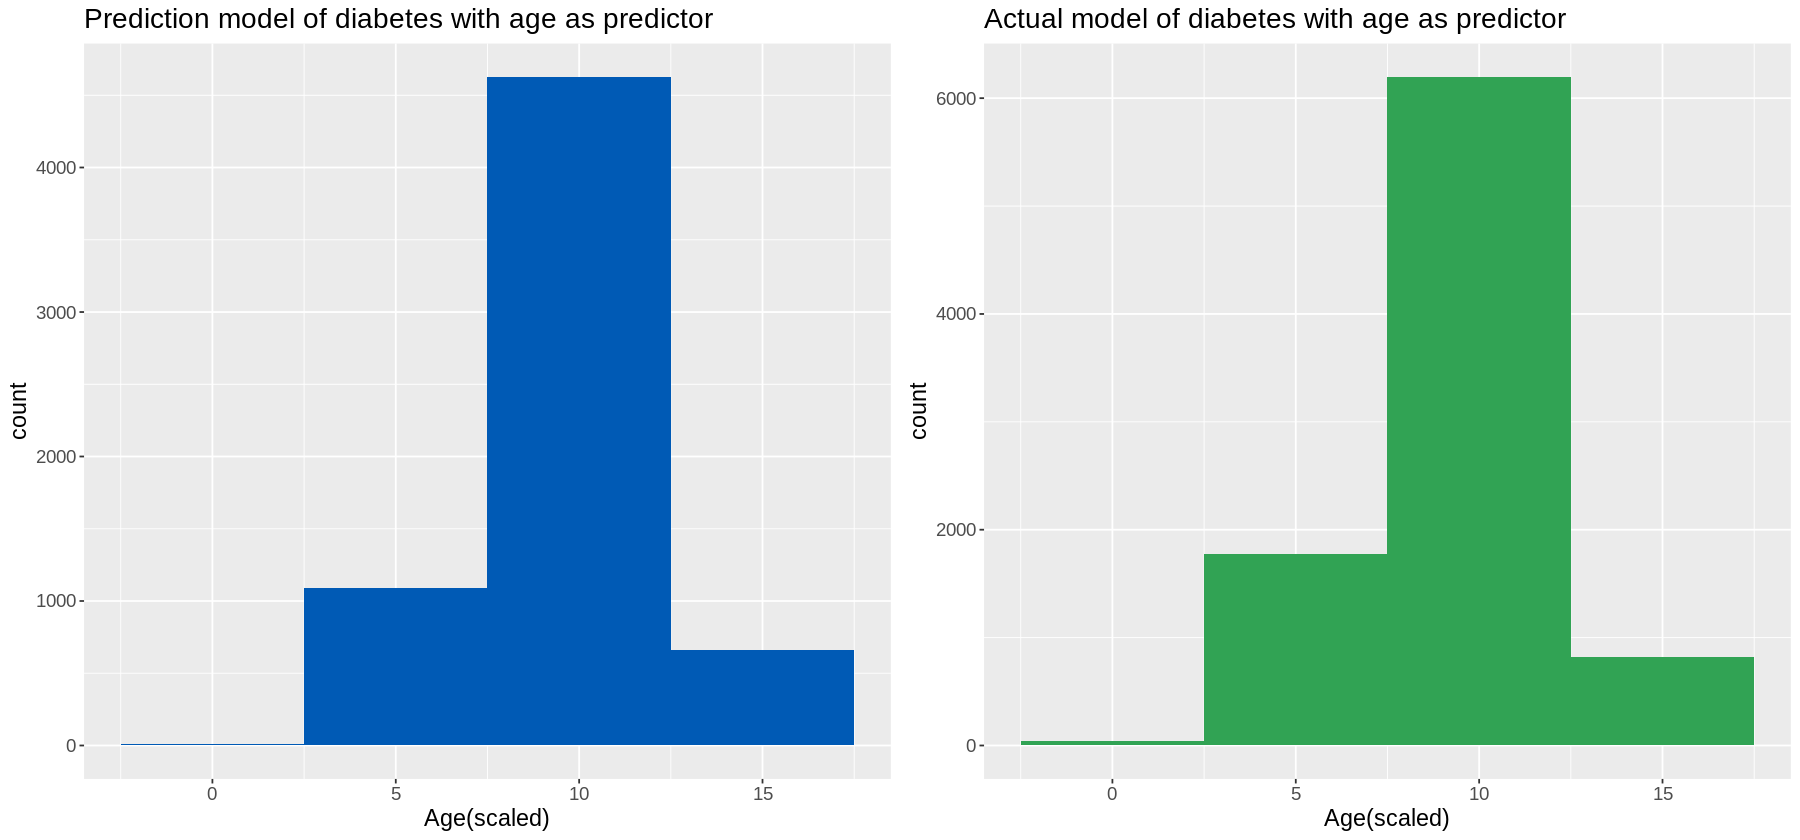

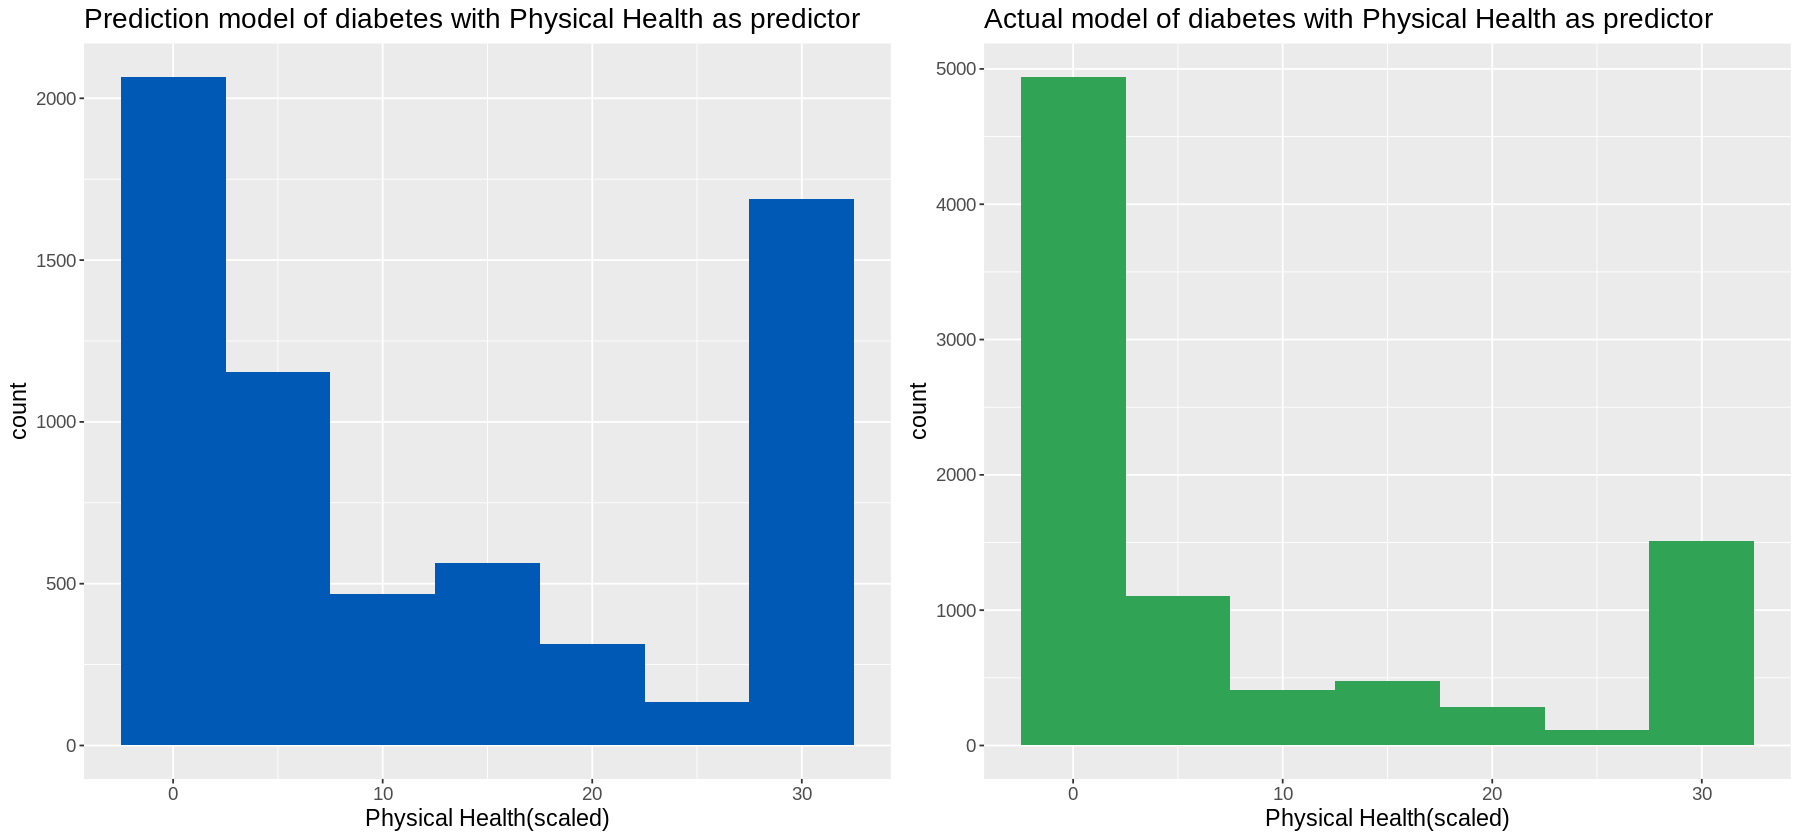

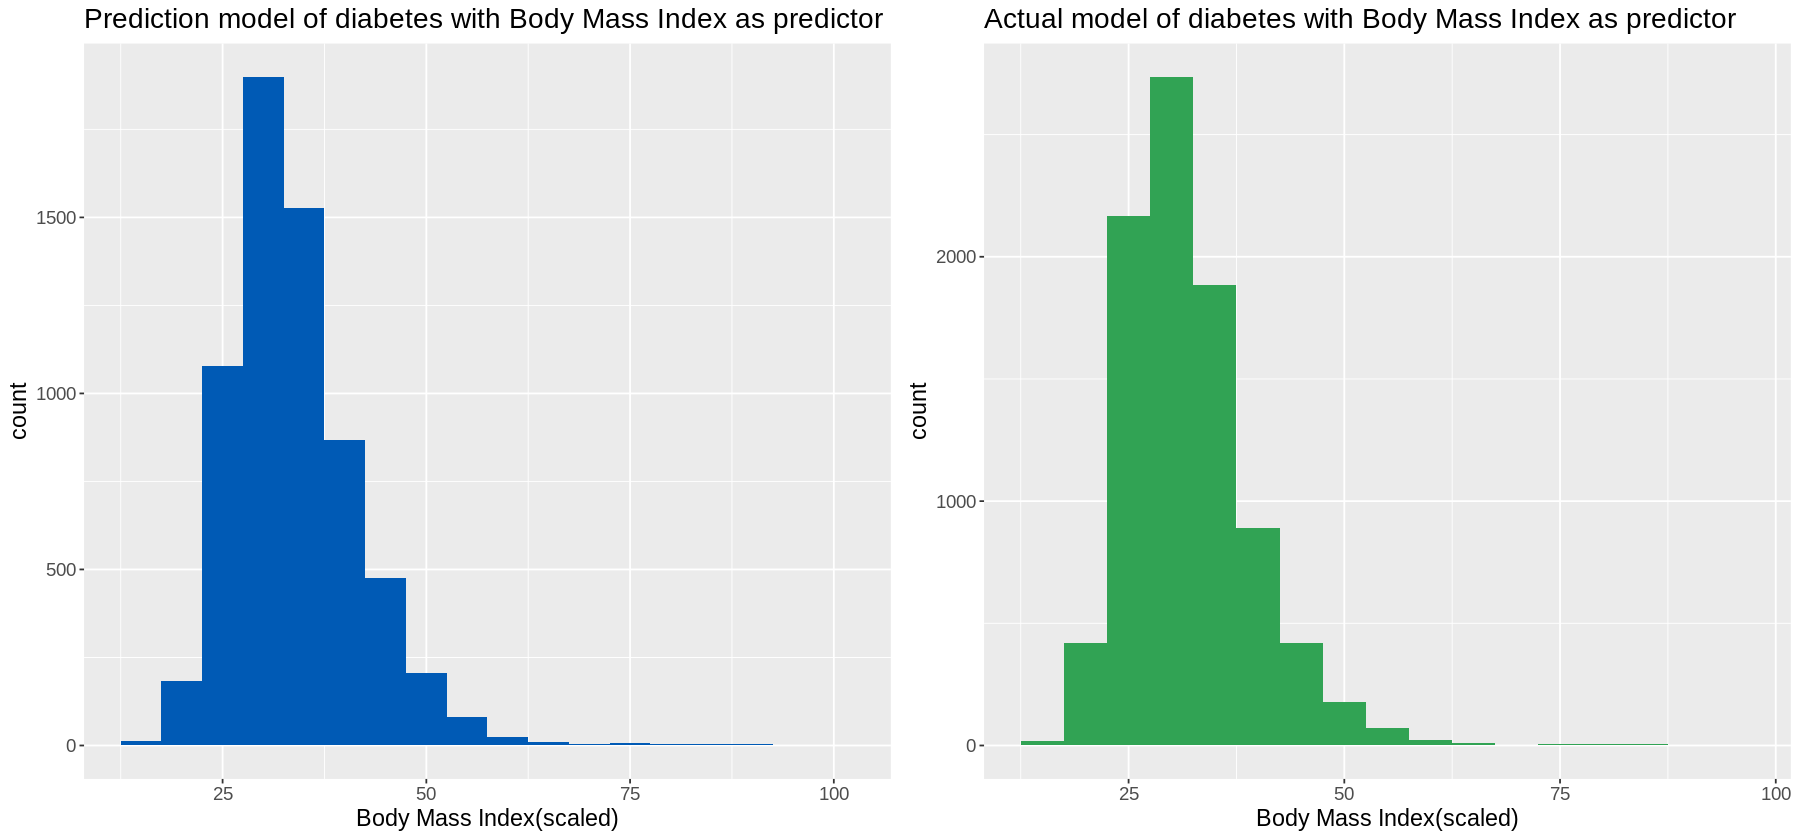

In [17]:
Age_prediction_dis <- diabetes_predictions |>
# the predict result is diabetes label
filter(.pred_class == 1) |>
ggplot(aes(x = Age)) +
geom_histogram(binwidth = 5, fill = "#005AB5")+
xlab("Age(scaled)")+
 theme(text = element_text(size = 14))+
ggtitle("Prediction model of diabetes with age as predictor")

Age_actual_dis <- diabetes_predictions |>
# the predict result is diabetes label
filter(Diabetes_binary == 1) |>
ggplot(aes(x = Age)) +
geom_histogram(binwidth = 5, fill = "#31a354")+
xlab("Age(scaled)") +
 theme(text = element_text(size = 14))+
ggtitle("Actual model of diabetes with age as predictor")

plot_grid(Age_prediction_dis, Age_actual_dis, ncol = 2)


PhysHlth_prediction_dis <- diabetes_predictions |>
# the predict result is diabetes label
filter(.pred_class == 1) |>
ggplot(aes(x = PhysHlth)) +
geom_histogram(binwidth = 5, fill = "#005AB5")+
xlab("Physical Health(scaled)")+
 theme(text = element_text(size = 14))+
ggtitle("Prediction model of diabetes with Physical Health as predictor")

PhysHlth_actual_dis <- diabetes_predictions |>
# the predict result is diabetes label
filter(Diabetes_binary == 1) |>
ggplot(aes(x = PhysHlth)) +
geom_histogram(binwidth = 5, fill = "#31a354")+
xlab("Physical Health(scaled)")+
 theme(text = element_text(size = 14))+
ggtitle("Actual model of diabetes with Physical Health as predictor")

plot_grid(PhysHlth_prediction_dis, PhysHlth_actual_dis, ncol = 2)


BMI_prediction_dis <- diabetes_predictions |>
# the predict result is diabetes label
filter(.pred_class == 1) |>
ggplot(aes(x = BMI)) +
geom_histogram(binwidth = 5, fill = "#005AB5")+
xlab("Body Mass Index(scaled)")+
 theme(text = element_text(size = 14))+
ggtitle("Prediction model of diabetes with Body Mass Index as predictor")

BMI_actual_dis <- diabetes_predictions |>
# the predict result is diabetes label
filter(Diabetes_binary == 1) |>
ggplot(aes(x = BMI)) +
xlab("Body Mass Index(scaled)")+
geom_histogram(binwidth = 5, fill = "#31a354")+
 theme(text = element_text(size = 14))+
ggtitle("Actual model of diabetes with Body Mass Index as predictor")

plot_grid(BMI_prediction_dis, BMI_actual_dis, ncol = 2)



[Figures 15. Predictive distribution of age, physical health, and BMI against diabetes (positive) and actual distribution]

The histograms contain numerical variables that affect diabetes the most, which were compared to the actual model plotted with the same variables.  Starting from the top, we can see that older age contributes to diabetes. Secondly, people with lower physical health are more likely to have diabetes. And lastly, diabetes is also more common in people whose BMI exceeds the normal weight (25). The predictive model did a good job as it has a similar pattern to the actual one.

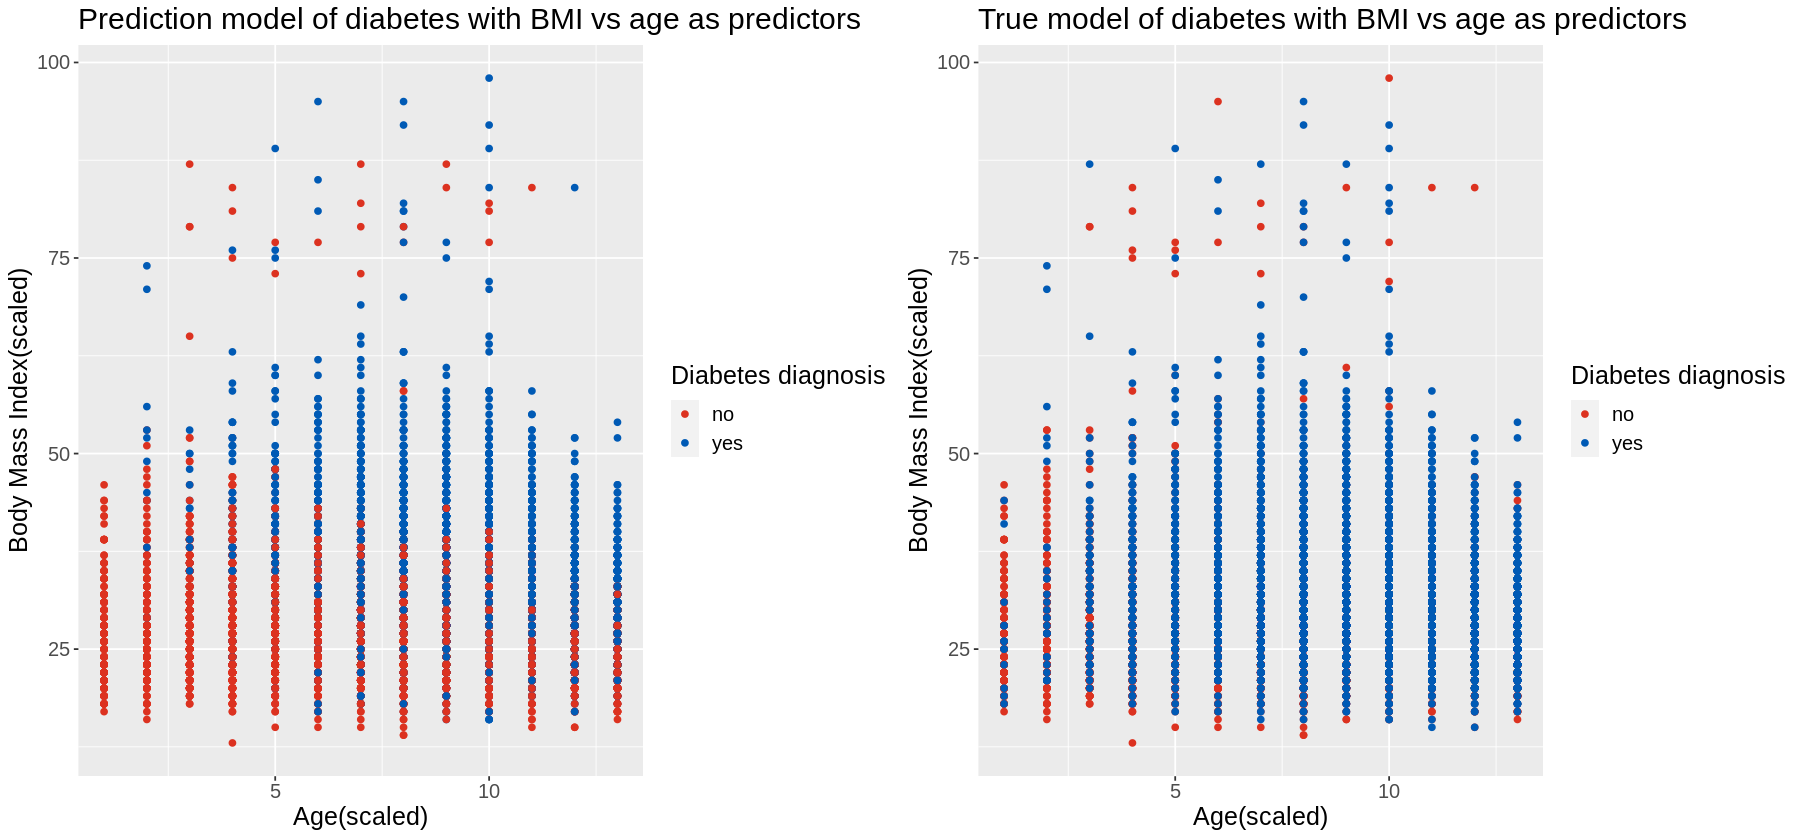

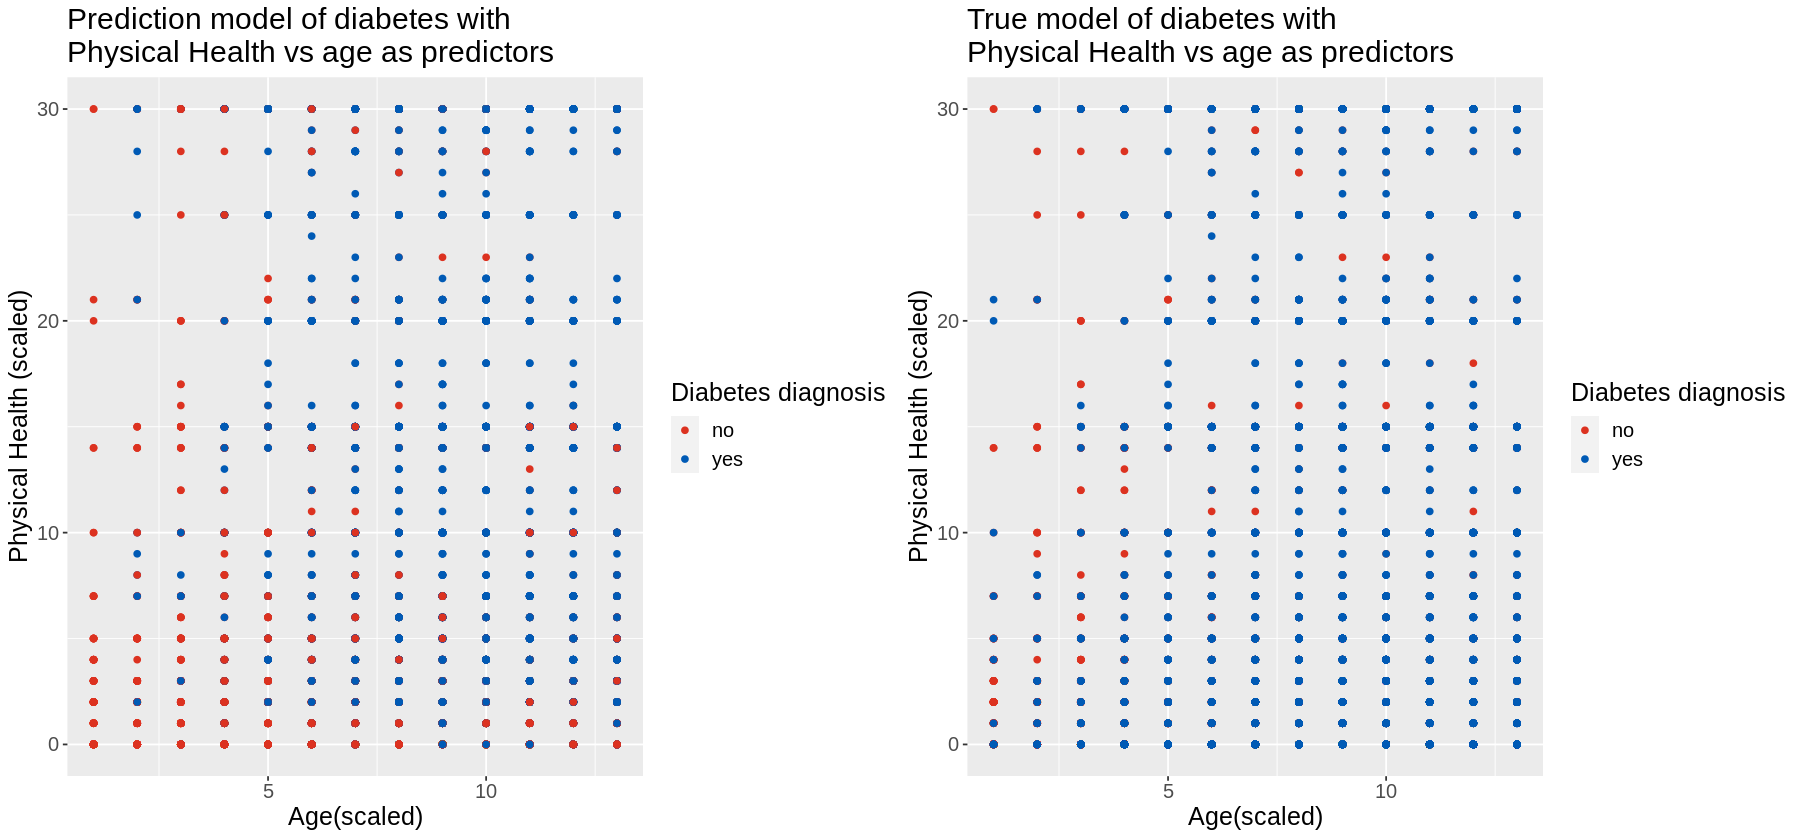

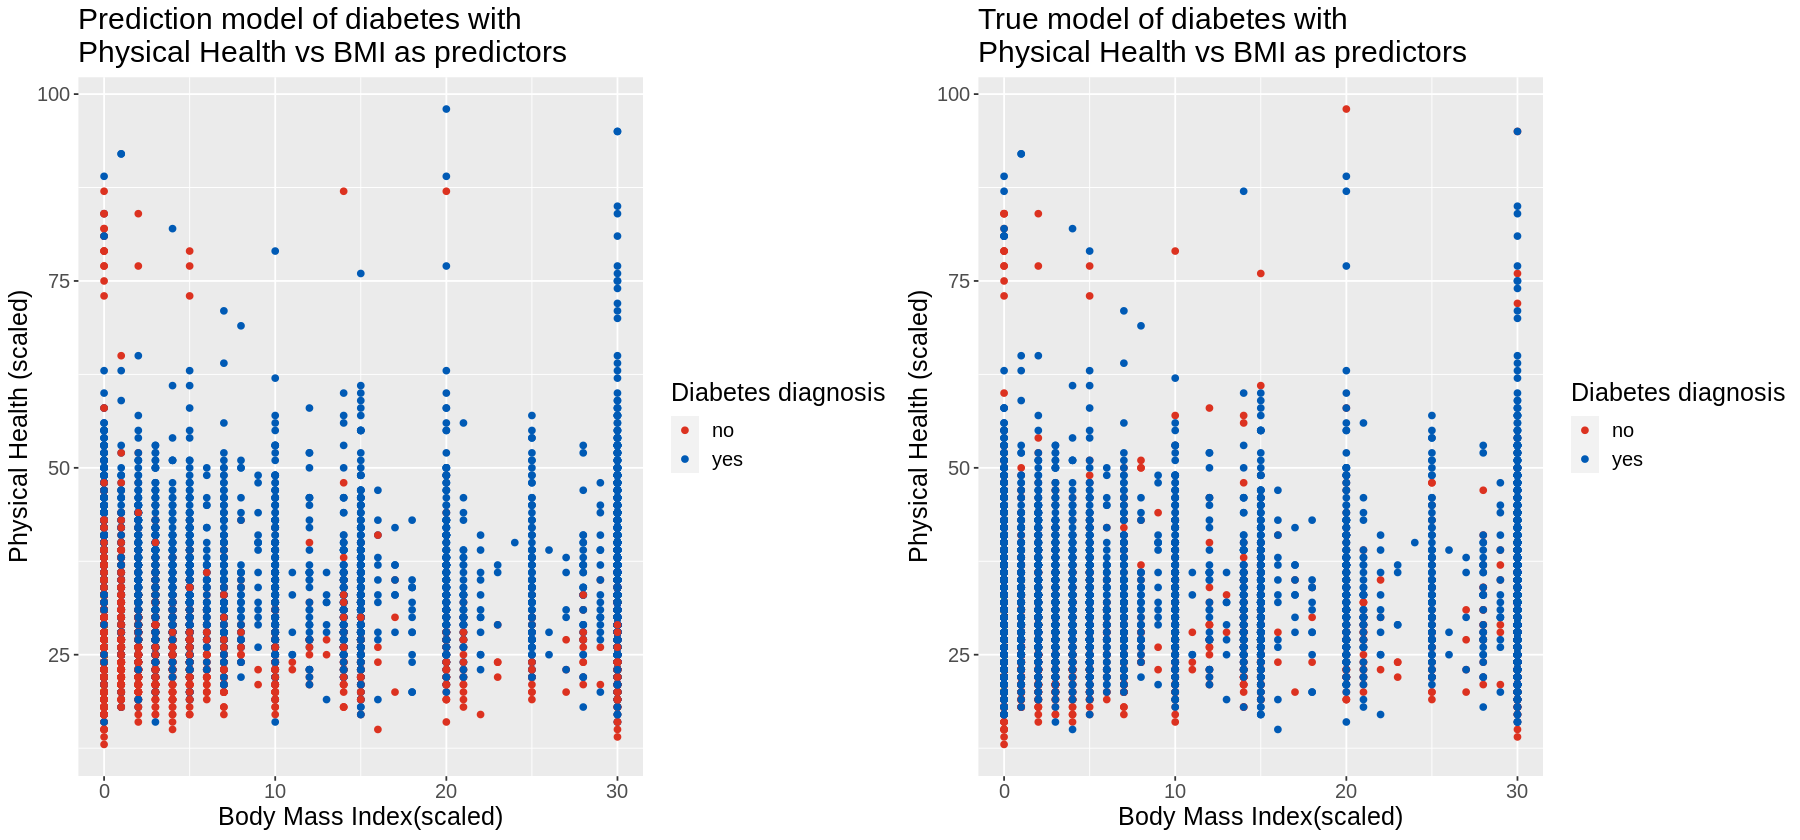

In [18]:

bmi_age_prediction_plot <-  diabetes_predictions |>
                            ggplot(aes(x = Age, y = BMI, color = .pred_class)) +
                            geom_point()+
                            labs(x = "Age(scaled)", y = "Body Mass Index(scaled)") +
                            scale_colour_manual("Diabetes diagnosis",labels = c("no", "yes"),values = c("#DC3220","#005AB5"))+
                             theme(text = element_text(size = 15))+
                            ggtitle("Prediction model of diabetes with BMI vs age as predictors")

bmi_age_actual_plot <- diabetes_predictions |>
                            ggplot(aes(x = Age, y = BMI, color = Diabetes_binary)) +
                            geom_point()+
                            labs(x = "Age(scaled)", y = "Body Mass Index(scaled)") +
                            scale_colour_manual("Diabetes diagnosis",labels = c("no", "yes"),values = c("#DC3220","#005AB5"))+
                             theme(text = element_text(size = 15))+
                            ggtitle("True model of diabetes with BMI vs age as predictors")


plot_grid(bmi_age_prediction_plot, bmi_age_actual_plot)


PhysHlth_age_prediction_plot <-  diabetes_predictions |>
                            ggplot(aes(x = Age, y = PhysHlth, color = .pred_class)) +
                            geom_point()+
                            labs(x = "Age(scaled)", y = "Physical Health (scaled)") +
                            scale_colour_manual("Diabetes diagnosis",labels = c("no", "yes"),values = c("#DC3220","#005AB5" ))+
                             theme(text = element_text(size = 15))+
                            ggtitle("Prediction model of diabetes with 
Physical Health vs age as predictors")

PhysHlth_age_actual_plot <-  diabetes_predictions |>
                            ggplot(aes(x = Age, y = PhysHlth, color = Diabetes_binary)) +
                            geom_point()+
                            labs(x = "Age(scaled)", y = "Physical Health (scaled)") +
                            scale_colour_manual("Diabetes diagnosis",labels = c("no", "yes"),values = c("#DC3220","#005AB5"))+
                             theme(text = element_text(size = 15))+
                            ggtitle("True model of diabetes with 
Physical Health vs age as predictors")

plot_grid(PhysHlth_age_prediction_plot, PhysHlth_age_actual_plot)


PhysHlth_BMI_prediction_plot <-  diabetes_predictions |>
                            ggplot(aes(x = PhysHlth, y = BMI, color = .pred_class)) +
                            geom_point()+
                            labs(x = "Body Mass Index(scaled)", y = "Physical Health (scaled)") +
                            scale_colour_manual("Diabetes diagnosis",labels = c("no", "yes"),values = c("#DC3220","#005AB5"))+
                             theme(text = element_text(size = 15))+
                            ggtitle("Prediction model of diabetes with 
Physical Health vs BMI as predictors")

PhysHlth_BMI_actual_plot <-  diabetes_predictions |>
                            ggplot(aes(x = PhysHlth, y = BMI, color = Diabetes_binary)) +
                            geom_point()+
                            labs(x = "Body Mass Index(scaled)", y = "Physical Health (scaled)") +
                            scale_colour_manual("Diabetes diagnosis",labels = c("no", "yes"),values = c("#DC3220","#005AB5"))+
                             theme(text = element_text(size = 15))+
                            ggtitle("True model of diabetes with 
Physical Health vs BMI as predictors")

plot_grid(PhysHlth_BMI_prediction_plot, PhysHlth_BMI_actual_plot)



[Figure 16. Scatter Plots of prediction model against the actual model/data of diabetes]

The scatter plots show the relationships of three variables (PhysHlth, Age, BMI) and diabetes. Three relationships or combinations were plotted and analyzed, namely, BMI vs Age, PhysHlth vs Age, and PhysHlth vs BMI. BMI and age seems to have a relationship but no relationship can be deduced from the other two plots. Overall, by comparing the blue and red points of both models, the predictive model did a good job in predicting most of the diabetes data.

# Discussion

***Discussion of results and accuracy***
***

After selecting our main predictors (Age, BMI, PhysHlth, HeartDiseaseorAttack, Stroke, and Diffwalk), a classification model was built to predict diabetes. The combined accuracy of these predictors were higher than other predictors in the dataset, reaching 66.7% accuracy which can be seen in Figure 11 and the confusion matrix that tests out how many “True Positive values” the model successfully predicted (Figure 12). 

The visualization of this analysis was also made where predictive models for each variable were compared to true diabetes models in Figure 14, 15, and 16. The bar plots made for binary variables show that the prediction model is successful as it has a similar blue colored proportion to the actual model (Figure 15). Blue colour depicts the proportion of people with diabetes based on each predictor. These plots also proved once again that stroke, heart disease or attack, and walking difficulty are predictors of diabetes as people with diabetes tend to have one or more of these three health factors compared to people without diabetes

For numerical variables, histograms were created to compare the distribution between diabetes prediction model and true diabetes model. This visualization also supports the accuracy of the prediction model as the distributions are similar for each variable to the true model. The histogram's distribution also verified that age, BMI, and physical health do affect diabetes in which older people, people with higher BMI (higher than the normal value of 25), and people with lower physical health tend to be at risk of diabetes (Figure 16). In addition to histograms, scatter plots were created to give us more information regarding the relationship between numerical variables by plotting the same variables (PhysHlth, BMI, Age) with diabetes (Figure 17). For instance, on the BMI vs Age plot, both prediction and actual model plots show that middle-aged people are more likely to have high BMI. When combining BMI and age, older people with higher BMI are more likely to have diabetes. Furthermore, there is no significant relationship between PhysHlth vs Age, and PhysHlth vs BMI as there are no trends in those two plots eventhough individually they do influence diabetes. We can also deduce that the prediction model did a decent job as it has similar blue and red points pattern that indicate diabetes prediction in the scatter plots.

While 66.7% seems low, it is important to note that the original data set was split to 50-50 for diabetes and non-diabetes people. Therefore, the model could predict 66.7% from 50% of people which is not bad. The accuracy could have been increased if more variables were used, however, overloading of variables will slow down the model significantly and these variables are not as impactful as the ones selected.




In [19]:
prop

Diabetes_binary,count,percentage
<dbl>,<int>,<dbl>
0,35346,50
1,35346,50





***Expectations and future questions***
***

The results met our expectations as all of these variables are related to lifestyle, including, our diet, sleeping conditions and physical activities which are in line with previous research that shows that physical activity and lifestyle  are the main risk factors to control in preventing diabetes (Uusitupa, 2019).  This finding brings impact on the steps that must be taken to prevent the disease in terms of controlling our lifestyle. Some preventive programs for BMI have been done in which lowering body weight was demonstrated to reduce the risk of diabetes (Vitolins, 2017). We believe that other factors that we found including Walking Difficulty could also be implemented in preventive programs where people go through physical therapy to prevent diabetes. Finally, although the predictive model built was not perfect, we are convinced that future work on this kind of predictive model would be useful in healthcare, especially in predicting diabetes.


This finding will propose further questions on other health factors that may increase the risk of getting diabetes besides the common ones like BMI. Instead of asking people regarding their health in a survey like this dataset, there will also be question on credibility: What determines whether someone is physically healthy or not? What is the standard? Answering these questions would lead to more reliable data on the risk factors of diabetes.



# References

- Alex Teboul. (2022). Diabetes Health Indicators Dataset. https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset

- Mujumdar, A., & Vaidehi, V. (2019). Diabetes prediction using machine learning algorithms. Procedia Computer Science, 165, 292-299. https://doi.org/10.1016/j.procs.2020.01.047

- Khan, M. A. B., Hashim, M. J., King, J. K., Govender, R. D., Mustafa, H., & Al Kaabi, J. (2020). Epidemiology of Type 2 Diabetes - Global Burden of Disease and Forecasted Trends. Journal of epidemiology and global health, 10(1), 107–111. https://doi.org/10.2991/jegh.k.191028.001

- Uusitupa, M., Khan, T. A., Viguiliouk, E., Kahleova, H., Rivellese, A. A., Hermansen, K., Pfeiffer, A., Thanopoulou, A., Salas-Salvadó, J., Schwab, U., & Sievenpiper, J. L. (2019). Prevention of Type 2 Diabetes by Lifestyle Changes: A Systematic Review and Meta-Analysis. Nutrients, 11(11), 2611. https://doi.org/10.3390/nu11112611

- Vitolins, M. Z., Isom, S. P., Blackwell, C. S., Kernodle, D., Sydell, J. M., Pedley, C. F., Katula, J. A., Case, L. D., & Goff, D. C., Jr (2017). The healthy living partnerships to prevent diabetes and the diabetes prevention program: a comparison of year 1 and 2 intervention results. Translational behavioral medicine, 7(2), 371–378. https://doi.org/10.1007/s13142-016-0447-z




